In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("../input/cardata2/car_data.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [13]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]
print(x)

     User ID  Gender  Age  AnnualSalary
0        385       1   35         20000
1        681       1   40         43500
2        353       1   49         74000
3        895       1   40        107500
4        661       1   25         79000
..       ...     ...  ...           ...
995      863       1   38         59000
996      800       0   47         23500
997      407       0   28        138500
998      299       0   48        134000
999      687       0   44         73500

[1000 rows x 4 columns]


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train)

     User ID  Gender  Age  AnnualSalary
253      987       1   20         20500
667      711       1   50         25500
85       667       0   51        136500
969      721       1   29        148000
75       629       0   50        115500
..       ...     ...  ...           ...
835      437       1   42         53500
192      522       0   26        118000
629      323       1   61         84500
559      515       0   30         62000
684      666       0   19         45500

[750 rows x 4 columns]


In [15]:
from pandas.core.indexes import category
for coln in df:
  df[coln]=df[coln].astype('category').cat.codes
  df.head()

In [16]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,384,1,17,9,0
1,680,1,22,54,0
2,352,1,31,112,0
3,894,1,22,175,1
4,660,1,7,122,0


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion ='gini',random_state =0)
dtree=dtree.fit(x_train,y_train)
dtree


DecisionTreeClassifier(random_state=0)

In [18]:
y_pred=dtree.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0])

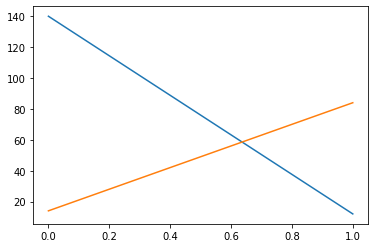

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm=metrics.confusion_matrix(y_pred,y_test)
cm
plt.plot(cm)

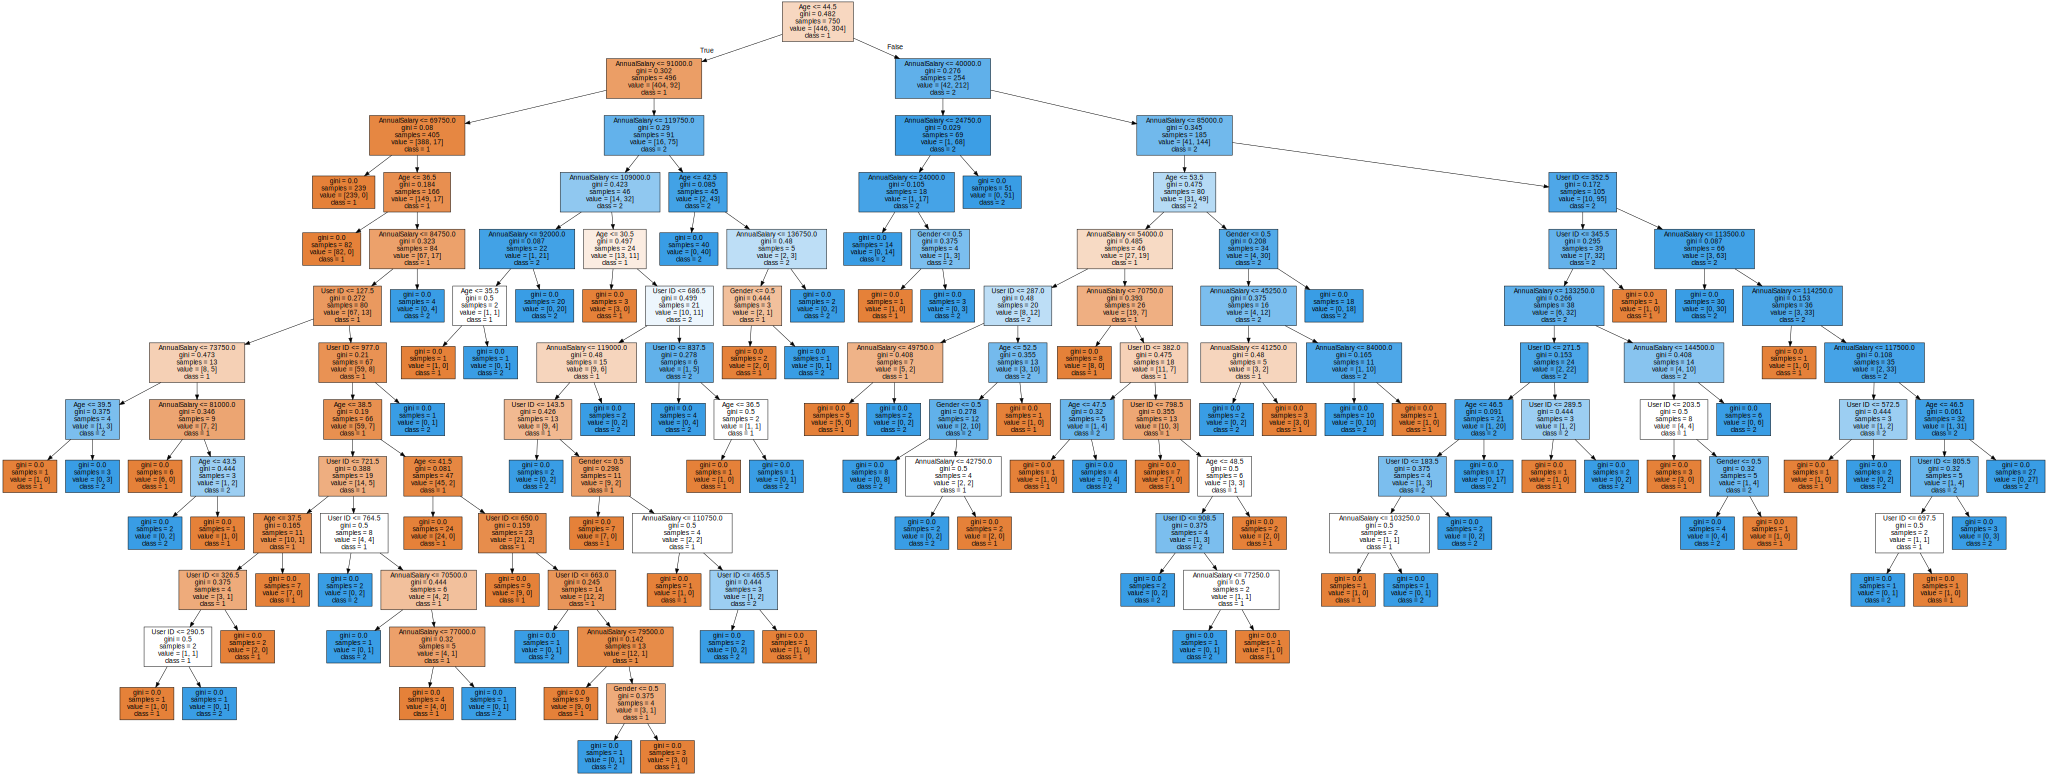

In [20]:
from sklearn.tree import export_graphviz
import graphviz
'''graphviz.Source(export_graphviz(dtree,feature_names=x.columns,filled=True,class_names=['1','2']))'''
graphviz.Source(export_graphviz(dtree,feature_names= x.columns,filled=True,class_names=['1','2','3','4'],out_file=None))